In [3]:
import os
import numpy as np         
import pandas as pd                
import matplotlib.pyplot as plt     
%matplotlib inline     
import seaborn as sns   
import warnings     
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
os.chdir("/Users/gilgu/OneDrive/Escritorio")
df = pd.read_excel("FuelConsumptionCo2.xlsx")
df.head(15)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230
5,2022,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29,231
6,2022,Acura,TLX Type S,Compact,3.0,6,AS10,Z,12.3,9.4,11.0,26,256
7,2022,Acura,TLX Type S (Performance Tire),Compact,3.0,6,AS10,Z,12.3,9.8,11.2,25,261
8,2022,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,Z,10.0,7.2,8.7,32,205
9,2022,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,Z,10.5,7.7,9.2,31,217


In [5]:
df.shape

(945, 13)

In [7]:
print(df.columns)

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


In [8]:
df['CO2EMISSIONS'].describe()

count    945.000000
mean     259.410582
std       64.486225
min       94.000000
25%      214.000000
50%      258.000000
75%      301.000000
max      608.000000
Name: CO2EMISSIONS, dtype: float64

# ver cuanta información tenemos en huecos para visualizarla y después filtrarla y eliminar esos registros.

# Elaboración del mapa de calor

<Axes: >

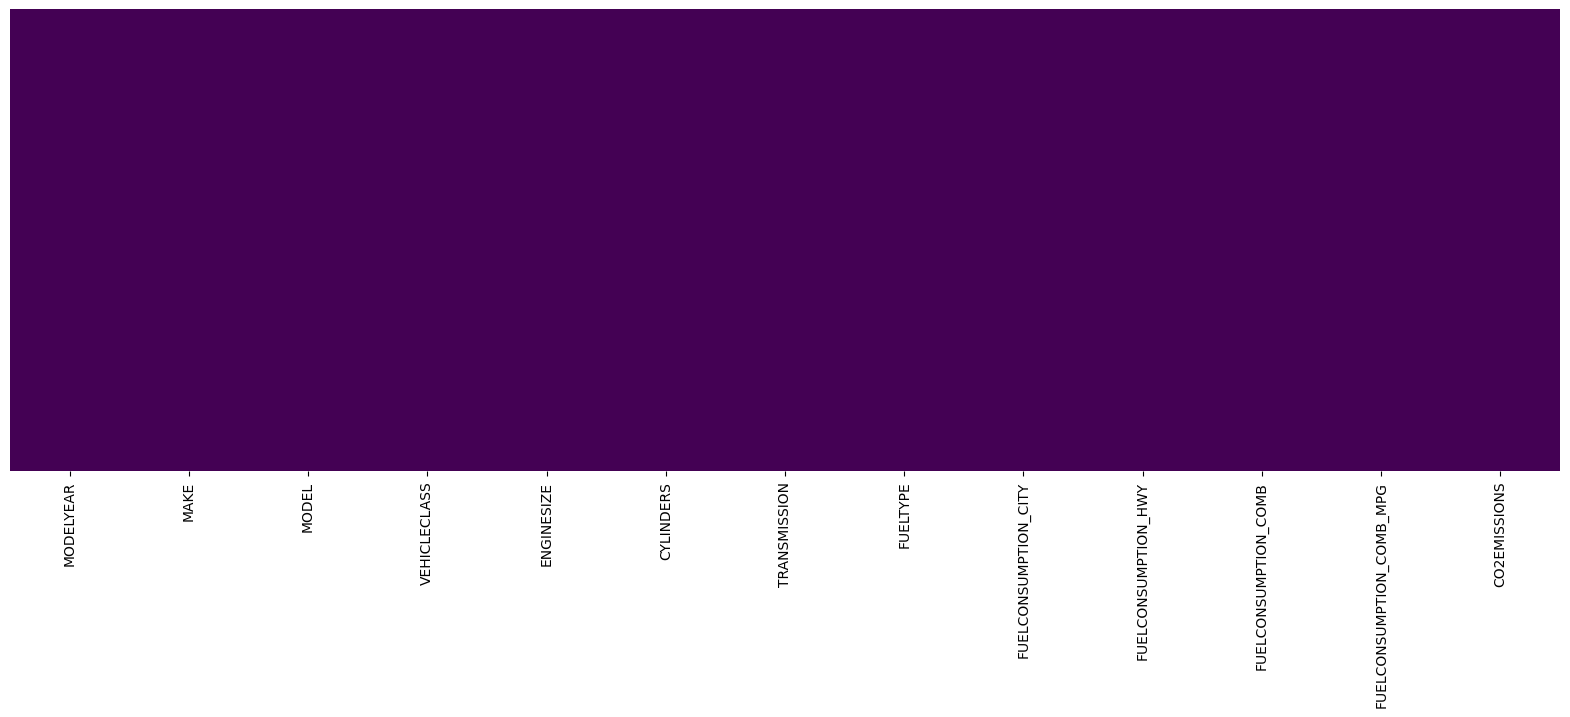

In [12]:
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis') 

# Se puede observar que el mapa de calor no arroja huecos para eliminar.

# Remover las características categóricas:

In [10]:
#este código elimina las columnas mencionadas:

df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1, inplace=True)     
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,33,200
1,3.5,6,12.6,9.4,11.2,25,263
2,2.0,4,11.0,8.6,9.9,29,232
3,2.0,4,11.3,9.1,10.3,27,242
4,2.0,4,11.2,8.0,9.8,29,230
...,...,...,...,...,...,...,...
940,2.0,4,10.7,7.7,9.4,30,219
941,2.0,4,10.5,8.1,9.4,30,219
942,2.0,4,11.0,8.7,9.9,29,232
943,2.0,4,11.5,8.4,10.1,28,236


In [11]:
df.shape

(945, 7)

In [14]:
X = df.drop('CO2EMISSIONS',axis=1)
y = df['CO2EMISSIONS']

In [15]:
X

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.4,4,9.9,7.0,8.6,33
1,3.5,6,12.6,9.4,11.2,25
2,2.0,4,11.0,8.6,9.9,29
3,2.0,4,11.3,9.1,10.3,27
4,2.0,4,11.2,8.0,9.8,29
...,...,...,...,...,...,...
940,2.0,4,10.7,7.7,9.4,30
941,2.0,4,10.5,8.1,9.4,30
942,2.0,4,11.0,8.7,9.9,29
943,2.0,4,11.5,8.4,10.1,28


In [16]:
y

0      200
1      263
2      232
3      242
4      230
      ... 
940    219
941    219
942    232
943    236
944    252
Name: CO2EMISSIONS, Length: 945, dtype: int64

# División en grupos de entrenamiento (training) y de prueba (testing):

In [17]:
from sklearn.model_selection import train_test_split

# se usa el 0.2 por el tamaño grande de la base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Construcción de un modelo de regresión lineal múltiple:

In [42]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

# Impresión de coeficientes de regresión

In [19]:
print("Intercepto: ", linreg.intercept_)
print("Coeficientes: ", linreg.coef_)

Intercepto:  121.9061104627929
Coeficientes:  [ 0.43160223  5.50285227 -0.6614582   1.15989448 13.74061389 -1.85532002]


In [20]:
y_pred = linreg.predict(X_test)
y_pred

array([320.44592329, 322.45141208, 346.24417982, 174.38112389,
       196.8708055 , 250.03840032, 241.40574334, 332.70807469,
       328.07208911, 173.25534359, 276.01260717, 226.83817563,
       323.59586634, 264.44421938, 176.39654449, 267.6669802 ,
       162.10975292, 221.21298827, 338.62730234, 326.71432991,
       322.45141208, 339.3464554 , 258.96340179, 221.21298827,
       340.63058185, 201.87136311, 366.08024545, 332.59359737,
       288.99231194, 137.51686587, 178.802307  , 176.39654449,
       239.69720483, 292.42838916, 313.2920352 , 290.12838279,
       330.67442902, 317.06241246, 328.07208911, 219.34248912,
       302.06652534, 293.60042335, 229.3999543 , 182.84139017,
       169.79398329, 249.13213529, 193.30963353, 344.3229224 ,
       152.60407682, 184.41729927, 292.01427499, 240.57140435,
       170.00578756, 261.89353542, 111.41565875, 313.87280401,
       343.62286446, 335.7074666 , 307.18607061, 383.7212297 ,
       198.49302356, 150.49885433, 186.4540574 , 305.77

# Cálculo de indicadores de error(de la bondad de ajuste):

In [21]:
from sklearn.metrics import r2_score
from sklearn import metrics

# Impresión de indicadores de bondad de ajuste:

In [22]:
print("Valor de R cuadrada: ", r2_score(y_test,y_pred))
print("Error absoluto medio: ", metrics.mean_absolute_error(y_test,y_pred))
print("Error cuadrático medio: ", metrics.mean_squared_error(y_test,y_pred))
print("Raíz del Error cuadrático medio: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Valor de R cuadrada:  0.9859198995539085
Error absoluto medio:  5.725511226830304
Error cuadrático medio:  62.05323405498587
Raíz del Error cuadrático medio:  7.877387514587935


# Regresión Ridge

In [29]:
# Alpha = 0 (Equivalente a una regresión lineal)

from sklearn.linear_model import Ridge

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridgereg = Ridge(alpha=0)   #<-----ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

# Impresión de indicadores de bondad de ajuste:
print("Valor de R cuadrada: ", r2_score(y_test,y_pred))
print("Error absoluto medio: ", metrics.mean_absolute_error(y_test,y_pred))
print("Error cuadrático medio: ", metrics.mean_squared_error(y_test,y_pred))
print("Raíz del Error cuadrático medio: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Valor de R cuadrada:  0.9775327964689399
Error absoluto medio:  6.418322097986066
Error cuadrático medio:  85.97881014782098
Raíz del Error cuadrático medio:  9.272475944849951


In [30]:
# Alpha = 0.1 

from sklearn.linear_model import Ridge

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridgereg = Ridge(alpha=0.1)   #<-----ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

# Impresión de indicadores de bondad de ajuste:
print("Valor de R cuadrada: ", r2_score(y_test,y_pred))
print("Error absoluto medio: ", metrics.mean_absolute_error(y_test,y_pred))
print("Error cuadrático medio: ", metrics.mean_squared_error(y_test,y_pred))
print("Raíz del Error cuadrático medio: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Valor de R cuadrada:  0.9775405388157287
Error absoluto medio:  6.4151358962504546
Error cuadrático medio:  85.94918128173926
Raíz del Error cuadrático medio:  9.27087812894438


# Examinación de los coeficientes de la regresión Ridge:¶

In [31]:
print("Intercepto: ", ridgereg.intercept_)
print("Coeficientes: ", ridgereg.coef_)

Intercepto:  123.99617710865991
Coeficientes:  [-0.017015    6.42593926 -0.50568931  1.19661489 13.05363848 -1.88187263]


# Definición de un rango de prueba para Alpha

In [32]:
alpha_range = 10.**np.arange(-2,3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [33]:
from sklearn.linear_model import RidgeCV         

ridgeregcv = RidgeCV(alphas=alpha_range, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

100.0

# Predicción mediante el mejor valor de Alpha:

In [34]:
y_pred = ridgeregcv.predict(X_test)

# Impresión de indicadores de bondad de ajuste:
print("Valor de R cuadrada: ", r2_score(y_test,y_pred))
print("Error absoluto medio: ", metrics.mean_absolute_error(y_test,y_pred))
print("Error cuadrático medio: ", metrics.mean_squared_error(y_test,y_pred))
print("Raíz del Error cuadrático medio: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Valor de R cuadrada:  0.9779646398338566
Error absoluto medio:  6.348640227908465
Error cuadrático medio:  84.32620667029262
Raíz del Error cuadrático medio:  9.182930178885856


In [35]:
#Examinación de los coeficientes de la regresión Ridge:
print("Intercepto: ", ridgeregcv.intercept_)
print("Coeficientes: ", ridgeregcv.coef_)

Intercepto:  129.9870201361167
Coeficientes:  [ 1.15258677  5.30842335  4.44225152  4.49815493  4.55653156 -1.95117901]


# Regresión Lasso

In [36]:
# Prueba con Alpha = 0.001

from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lassoreg = Lasso(alpha=0.001)
lassoreg.fit(X_train, y_train)

#Examinación de los coeficientes de la regresión Lasso:
print("Intercepto: ", lassoreg.intercept_)
print("Coeficientes: ", lassoreg.coef_)

Intercepto:  123.13486003787813
Coeficientes:  [-0.05568687  6.39362175  7.1821322   7.48383257 -0.85056791 -1.86749083]


In [37]:
# Prueba con Alpha = 0.01

from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lassoreg = Lasso(alpha=0.01)
lassoreg.fit(X_train, y_train)

#Examinación de los coeficientes de la regresión Lasso:
print("Intercepto: ", lassoreg.intercept_)
print("Coeficientes: ", lassoreg.coef_)

Intercepto:  123.34866942884366
Coeficientes:  [-0.          6.36561443  6.29526617  6.74930805  0.75481726 -1.87010303]


# Determinación del grado de bondad de ajuste con Alpha = 0.01

In [38]:
y_pred = lassoreg.predict(X_test)

# Impresión de indicadores de bondad de ajuste:
print("Valor de R cuadrada: ", r2_score(y_test,y_pred))
print("Error absoluto medio: ", metrics.mean_absolute_error(y_test,y_pred))
print("Error cuadrático medio: ", metrics.mean_squared_error(y_test,y_pred))
print("Raíz del Error cuadrático medio: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Valor de R cuadrada:  0.977565671226078
Error absoluto medio:  6.402295982607703
Error cuadrático medio:  85.85300310206556
Raíz del Error cuadrático medio:  9.26568956430473


# Selección del valor óptimo de Alpha para la regresión Lasso:

In [39]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, random_state=1)
lassoregcv.fit(X_train, y_train)
print("Alpha óptimo: ", lassoregcv.alpha_)

Alpha óptimo:  0.45442206714715017


In [40]:
print("Intercepto: ", lassoregcv.intercept_)
print("Coeficientes: ", lassoregcv.coef_)

Intercepto:  126.10535289477255
Coeficientes:  [ 0.          6.14099602  5.4462973   5.62023828  2.61988286 -1.90585504]


# Predicción mediante regresión de Lasso con un Alpha óptimo:

In [41]:
y_pred = lassoregcv.predict(X_test)

# Impresión de indicadores de bondad de ajuste:
print("Valor de R cuadrada: ", r2_score(y_test,y_pred))
print("Error absoluto medio: ", metrics.mean_absolute_error(y_test,y_pred))
print("Error cuadrático medio: ", metrics.mean_squared_error(y_test,y_pred))
print("Raíz del Error cuadrático medio: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Valor de R cuadrada:  0.9775539332111336
Error absoluto medio:  6.405732289229932
Error cuadrático medio:  85.89792282503058
Raíz del Error cuadrático medio:  9.26811322897118
